In [2]:
   #NEWS CLASSIFICATION ASSIGNMENT   
    #News Category 
    # A set Algorithmns to categories news based on their headlines
    #Import libraries.
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)
import os
from os.path import exists
import tensorflow as tf
import tensorflow.compat.v2 as tf
from keras import backend as K
# from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
print(os.listdir("../input"))


ImportError: cannot import name 'merge' from 'keras.layers' (C:\Users\n\anaconda3\lib\site-packages\keras\layers\__init__.py)

In [ ]:
 #Meta Information Of the Dataset
    #Data preparation
     #Data preprocessing
     #Getting the data Head
    #Visualizing the First Five Data Record
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline
#working with Downloaded Dataset
#df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True) can also work
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.head()


In [3]:
#Data preprocessing
#Getting the data tail,the last Datarecords
#df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True) can also work
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.tail()


ValueError: Expected object or value

Hello World


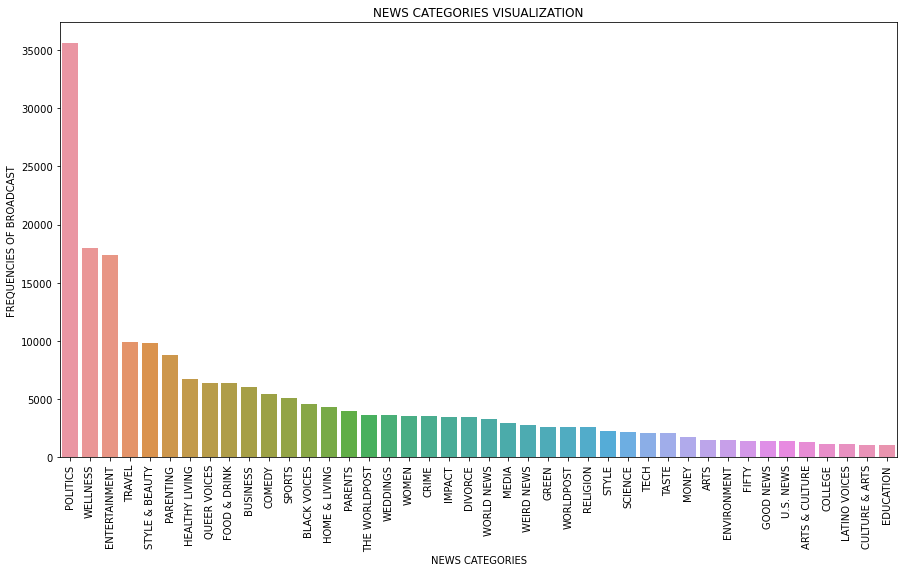

In [9]:
#Visualizing The News dataset in A graphical Model
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

#Ploting a abar plot
plt.figure(figsize=(15,8))
count = df.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.ylabel('FREQUENCIES OF BROADCAST')
plt.xlabel('NEWS CATEGORIES')
plt.title('NEWS CATEGORIES VISUALIZATION')
plt.xticks(rotation=90);
print("Hello World")

In [11]:
#Visualizing News Groupings and getting the total number of each News set
Newscategory = df.groupby('category')
print("The Total News categories:", Newscategory .ngroups)
print(Newscategory .size())



The Total News categories: 42
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4583
BUSINESS           5992
COLLEGE            1144
COMEDY             5400
CRIME              3562
CULTURE & ARTS     1074
DIVORCE            3426
EDUCATION          1014
ENTERTAINMENT     17362
ENVIRONMENT        1444
FIFTY              1401
FOOD & DRINK       6340
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4320
IMPACT             3484
LATINO VOICES      1130
MEDIA              2944
MONEY              1756
PARENTING          8791
PARENTS            3955
POLITICS          35602
QUEER VOICES       6347
RELIGION           2577
SCIENCE            2206
SPORTS             5077
STYLE              2254
STYLE & BEAUTY     9814
TASTE              2096
TECH               2104
THE WORLDPOST      3664
TRAVEL             9900
U.S. NEWS          1377
WEDDINGS           3653
WEIRD NEWS         2777
WELLNESS          17945
WOMEN              3572
W

In [1]:
 #Data Cleaning

import string
import nltk
import numpy as np
import pandas as pd
import re
import json

def clean_text(text):
    words = nltk.tokenize.word_tokenize(text)
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip() # remove any repeated gaps
    stopwords = nltk.corpus.stopwords.words('english')#Clears all stop words
    text =  re.sub(r'@\S+', '',text) # Clears all twitter handles
    text = text.lower()      # Tries to lower-case all characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')# stores only words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    text =  re.sub(r'http\S+', '',text) # remove any urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)# only characters are left
   
    return text

In [ ]:
df['Text_cleaning'] = df.headline.apply(clean_text)
df.head()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [13]:
#Establishing if there is any null Values in the data columns
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [14]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [15]:
#News categorized only based on the  Headlines,Category and Short Descriptions
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.drop(['authors','link','date'],axis=1,inplace=True)

In [16]:
df.head()

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [17]:
#News classifications Based only on the Category and Descriptions
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.drop(['authors','link','date','headline'],axis=1,inplace=True)

In [18]:
df.head()

,category,short_description
0,U.S. NEWS,Health experts said it is too early to predict...
1,U.S. NEWS,He was subdued by passengers and crew when he ...
2,COMEDY,"""Until you have a dog you don't understand wha..."
3,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


In [19]:
#Displays only the lAST Five News Categories based on the Category and Short Descriptions
df.tail()

,category,short_description
209522,TECH,Verizon Wireless and AT&T are already promotin...
209523,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,SPORTS,CORRECTION: An earlier version of this story i...
209526,SPORTS,The five-time all-star center tore into his te...


In [ ]:
categories = df.groupby('category').size().index.tolist()
category_int = {}
int_category = {}
for i, k in enumerate(categories):
    category_int.update({k:i})
    int_category.update({i:k})

df['c2id'] = df['category'].apply(lambda x: category_int[x])



In [20]:
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
import pandas as pd

df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df['category'].unique()
df.head()

In [ ]:
# most frequent unigrams of news belongs 'SCIENCE' category
import pandas as pd
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
df['category'].unique()
category_ngram('SCIENCE', 1)
df.head()


In [ ]:
# most frequent bigrams of news belongs 'SPORTS' category
import pandas as pd
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
category_ngram('SPORTS', 2)
df.head()

In [ ]:
# most frequent trigrams of news belongs 'POLITICS' category
import pandas as pd
df = pd.read_json('C:\\Users\\n\\Downloads\\archive\\News_Category_Dataset_v3.json', lines=True)
category_ngram('POLITICS', 3)
df.head()


In [ ]:
#The grams for the remaining News Categories can be Obtained using the same Algorithm
      #******THANK YOU*******